In [1]:
import numpy as np
import mne
import pickle
import sys
import os
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import heartpy as hp
from multiprocessing import Pool

%matplotlib inline
#./gdrive-linux-x64 upload -r --parent 15_ZWlKZqxfX5iqFYa31y6A6fHjE_cQbG ~/pench/graphs/

In [27]:
bloc={
    "sync":1,
    "baseline":2,
    "stressor":3,
    "survey":4,
    "rest":5,
    "slowBreath":6,
    "paced":7
}

reverse={
    1:"sync1",
    2:"baseline1",
    3:"stressor1",
    4:"survey1",
    5:"rest1",
    6:"slowBreath1",
    7: "paced1"
}

colors={
    1:'w', #White
    2:'k',
    3:'r',
    4:'y',
    5:'m',
    6:'b',
    7:'c'
}

lines={
    'bpm':'-',
    'sdnn':'-',
    'rmssd':'-',
    'pnn50':'-',
    'hf':'-'
}

#Generate blocks

blocks=[
    ("sync",6),
    ("baseline", 120),
    ("stressor", 90),
    ("survey", 10),
    ("rest", 30),
    ("slowBreath", 200),
    ("survey", 10),
    ("rest", 30),
    ("stressor", 90),
    ("survey", 10),
    ("rest", 30),
    ("paced", 200),
    ("survey", 10),
    ("rest", 30),
    ("stressor", 90),
    ("survey", 10),
    ("rest", 30),
    ("slowBreath", 200),
    ("survey", 10),
    ("rest", 30),
    ("stressor", 90),
    ("survey", 10),
    ("rest", 30),
    ("paced", 200),
    ("survey", 10),
    ("rest", 30)
]
len(blocks)
timeline = [[], []]
star=0
for elem in blocks:
    timeline[0].append(star+elem[1])
    timeline[1].append(elem[0])
    star+=elem[1]
for i in range(len(timeline[0])):
    timeline[0][i]=125*timeline[0][i]
# timeline=pickle.load(open('timeline', 'rb'))

In [28]:
timeline

[[750,
  15750,
  27000,
  28250,
  32000,
  57000,
  58250,
  62000,
  73250,
  74500,
  78250,
  103250,
  104500,
  108250,
  119500,
  120750,
  124500,
  149500,
  150750,
  154500,
  165750,
  167000,
  170750,
  195750,
  197000,
  200750],
 ['sync',
  'baseline',
  'stressor',
  'survey',
  'rest',
  'slowBreath',
  'survey',
  'rest',
  'stressor',
  'survey',
  'rest',
  'paced',
  'survey',
  'rest',
  'stressor',
  'survey',
  'rest',
  'slowBreath',
  'survey',
  'rest',
  'stressor',
  'survey',
  'rest',
  'paced',
  'survey',
  'rest']]

In [29]:
data=pickle.load(open('pickled-avg/OpenBCISession_2020-02-14_11-09-00-SEVEN', 'rb'))
data[-2][19]

{'bpm': -1,
 'ibi': -1,
 'sdnn': -1,
 'sdsd': -1,
 'rmssd': -1,
 'pnn20': -1,
 'pnn50': -1,
 'hr_mad': -1,
 'sd1': -1,
 'sd2': -1,
 's': -1,
 'sd1/sd2': -1,
 'breathingrate': -1,
 'lf': -1,
 'hf': -1,
 'lf/hf': -1,
 'segment_indices': (-1, -1)}

In [30]:
def compileHRData(data, metrics=['bpm']):
    out=[]
    block={}
    x=[]
    start=0
    for i in range(1, len(data)):
            if data[i-1][20]!=data[i][20]:
                #New block
                out.append([[x, block], bloc[data[i-1][20]]])
                block={}
                start=i
                x=[]
            for elem in metrics:
                if elem not in block.keys():
                    block[elem]=[]
                block[elem].append(data[i-1][19][elem])
            x.append(i)
    return out

pl=compileHRData(data)

In [31]:
pl[0][1]

1

In [32]:
data[1000][19]

{'bpm': 91.74311926605505,
 'ibi': 654.0,
 'sdnn': 216.10799769251176,
 'sdsd': 130.9360241654008,
 'rmssd': 188.78623473188512,
 'pnn20': 0.8181818181818182,
 'pnn50': 0.6060606060606061,
 'hr_mad': 96.0,
 'sd1': 121.77807269742361,
 'sd2': 267.60737655935554,
 's': 102380.45367587308,
 'sd1/sd2': 0.4550624660019905,
 'breathingrate': 0.095565749235474,
 'lf': 47243.45341057253,
 'hf': 383125.89542527846,
 'lf/hf': 0.1233105200527655,
 'segment_indices': (0, 15000)}

In [58]:
def ma(name='OpenBCISession_2020-02-14_11-09-00-SEVEN', metrics=['hf', 'bpm', 'sdnn', 'rmssd', 'pnn50'], combine=False):
    
    data=pickle.load(open('pickled-avg/'+name, 'rb'))
    for metric in metrics:
        reverse={
            1:"sync1",
            2:"baseline1",
            3:"stressor1",
            4:"survey1",
            5:"rest1",
            6:"slowBreath1",
            7: "paced1"
        }
        pl=compileHRData(data, [metric])
        
#         ou=open('./graphs-avg/' + name + '-' + metric + '.csv', 'w')
#         for i in range(len(data)):
#             ou.write(str(data[i][19][metric]) + ', ' + str(bloc[data[i][20]]) + '\n')
        
        plt.figure(figsize=(25,10), dpi=250)
        # fig, ax = plt.subplots()
        for block in pl:
            metrics=list(block[0][1].keys())
#             print("metrics", metrics)
            for metric in metrics:
                plt.plot(block[0][0], block[0][1][metric], linestyle=lines[metric], color=colors[block[1]])
#                 plt.psd(block[0][1][metric], linestyle=lines[metric], label=reverse[block[1]])
            reverse[block[1]]=reverse[block[1]][:-1]+str(int(reverse[block[1]][-1])+1)

        plt.axes().xaxis.set_major_formatter(ticker.NullFormatter())
#         custom=timeline[0][:-1]
#         custom.insert(0,0)
#         print(len(custom), custom)
#         print(len(timeline), timeline)
        plt.axes().xaxis.set_minor_locator(ticker.FixedLocator(timeline[0]))
        plt.axes().xaxis.set_minor_formatter(ticker.FixedFormatter(timeline[1][1:]))
        plt.setp(plt.axes().xaxis.get_minorticklabels(), rotation=90)
        plt.legend(loc="upper left")
        plt.title('HRV Data')
        plt.ylabel(" ,".join(metrics))
#         plt.xlabel('Frequency')
        plt.xlabel('Frequency')
        plt.savefig('./graphs-avg/' + name + '-' + metric + '.png')
#         plt.show()
def makeGraph(pack):
    try:
        ma(pack)
    except Exception as e: 
        print("broke on", pack)
        print(e)



In [59]:

baseFolder="/home/sean/pench/pickled-avg/"
# files = os.listdir(baseFolder)
files=[f for f in os.listdir(baseFolder) if not f.startswith('.')]


/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

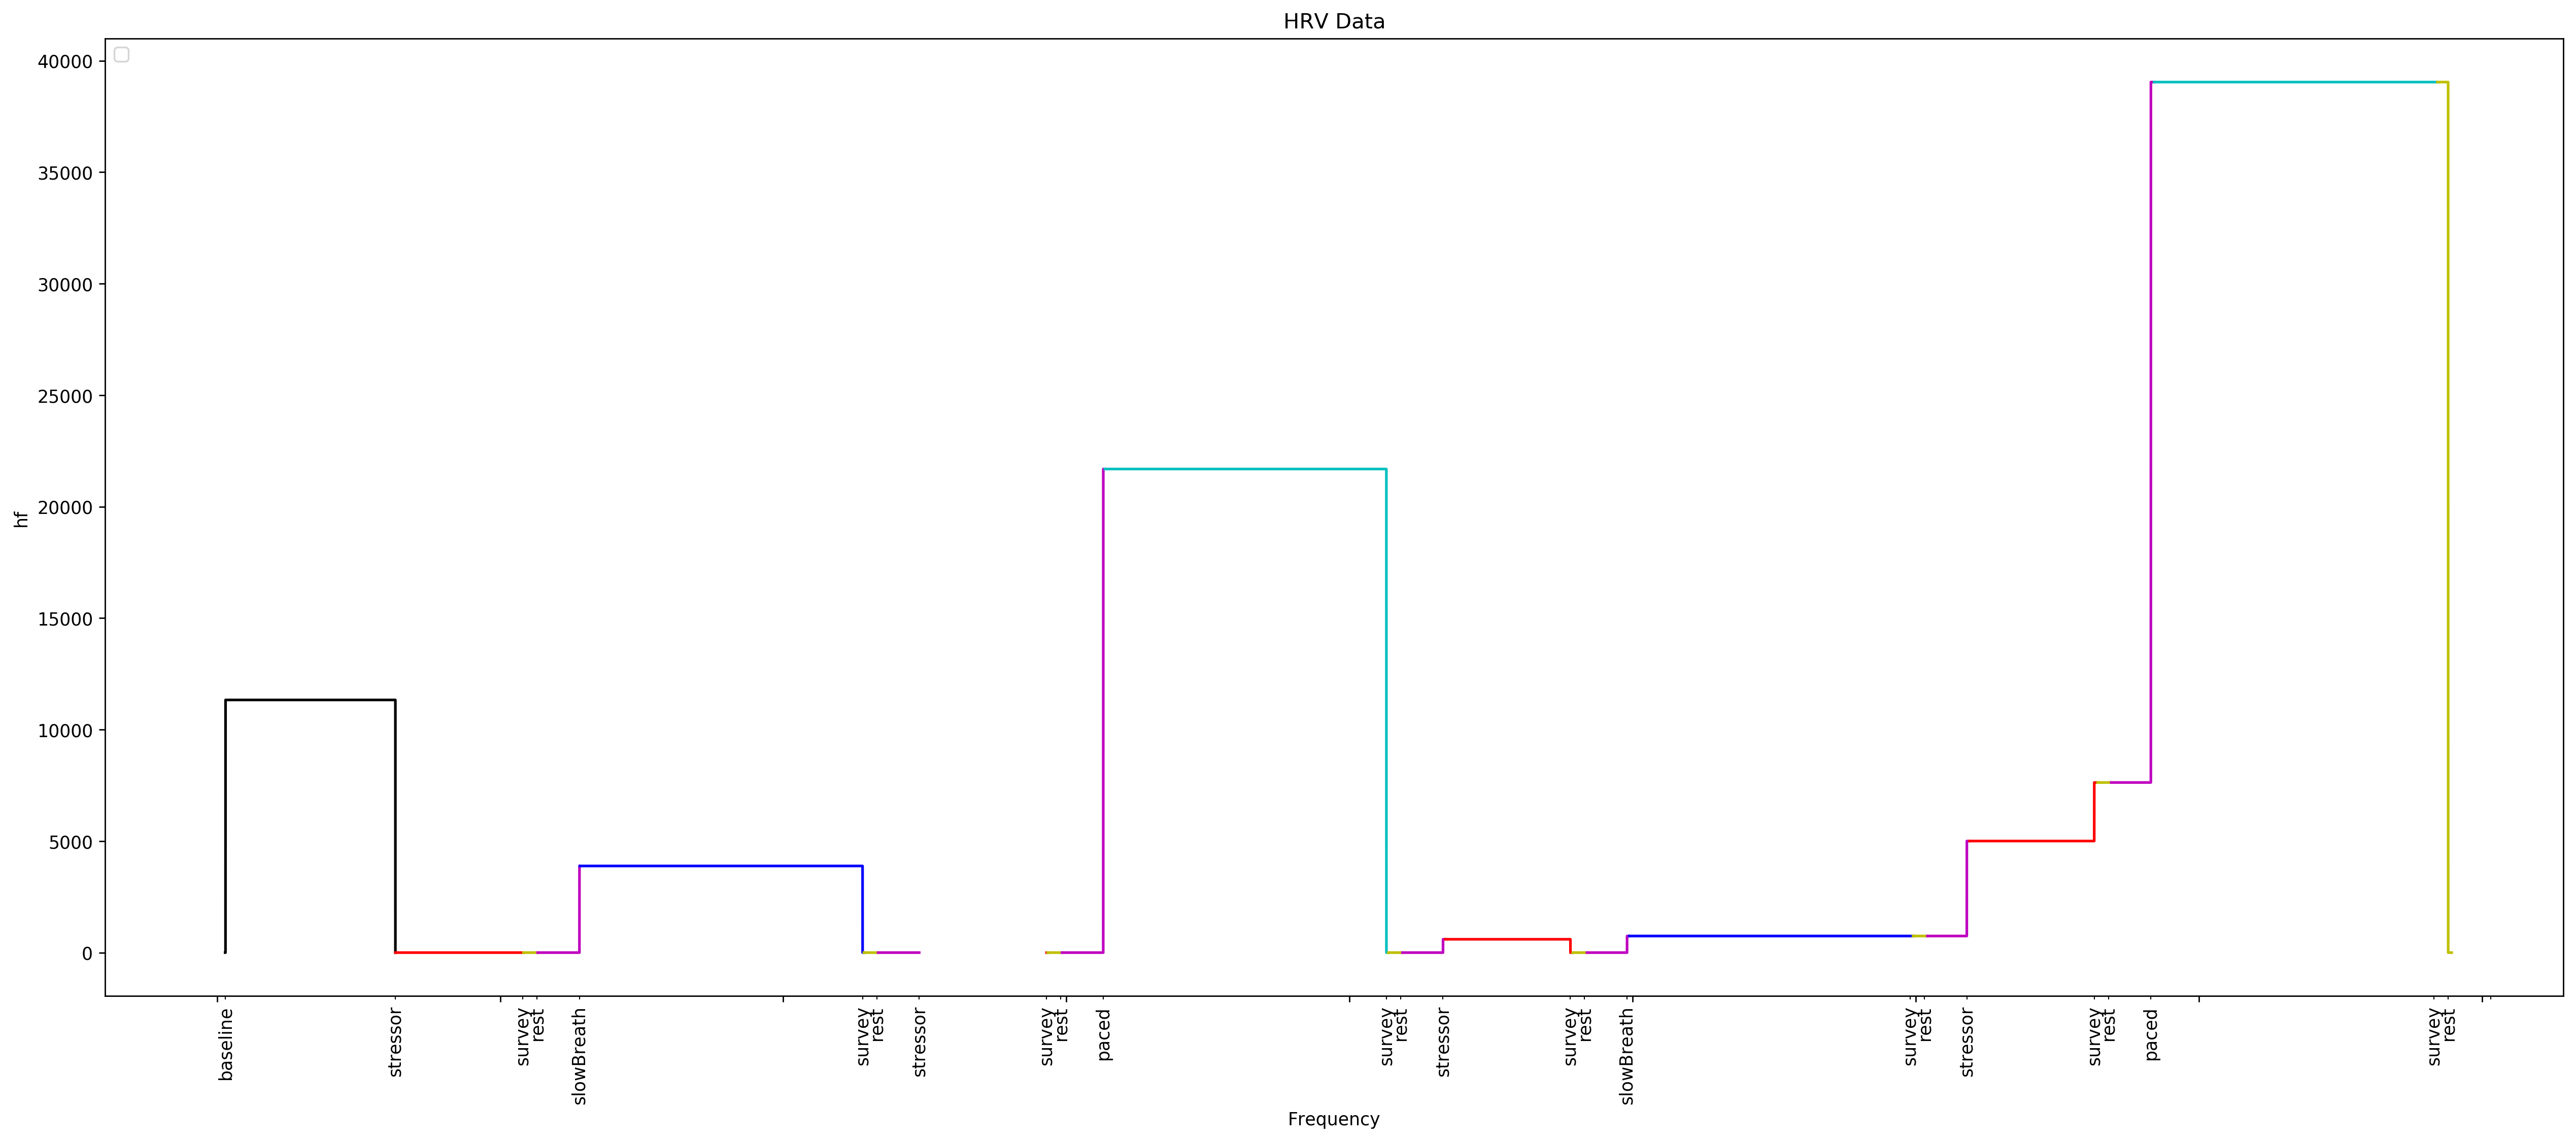

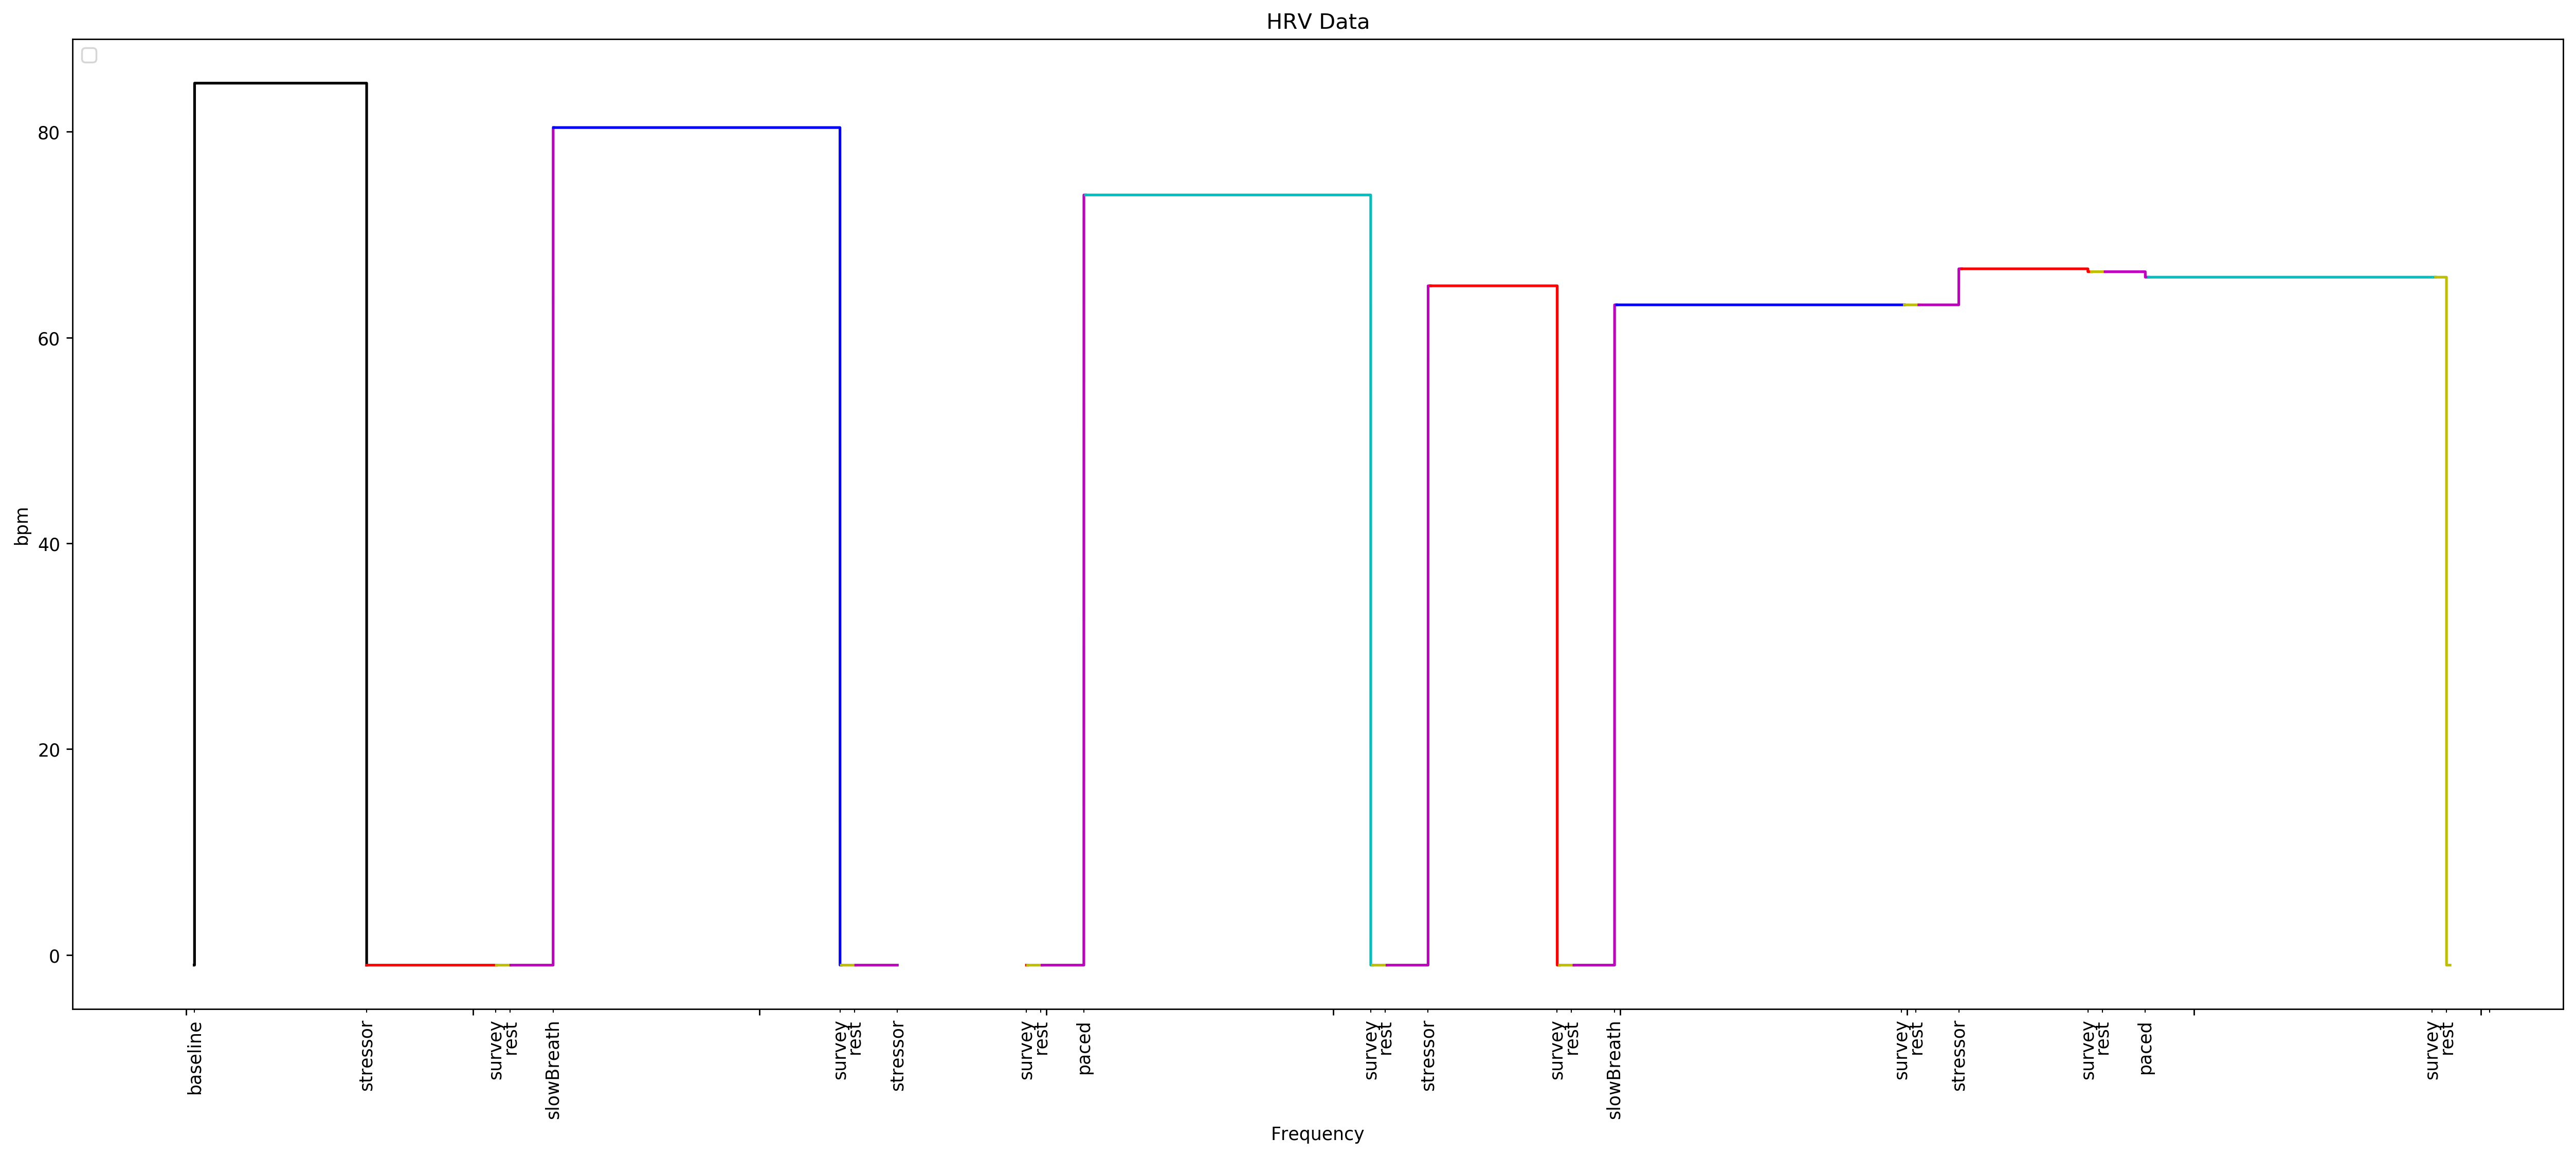

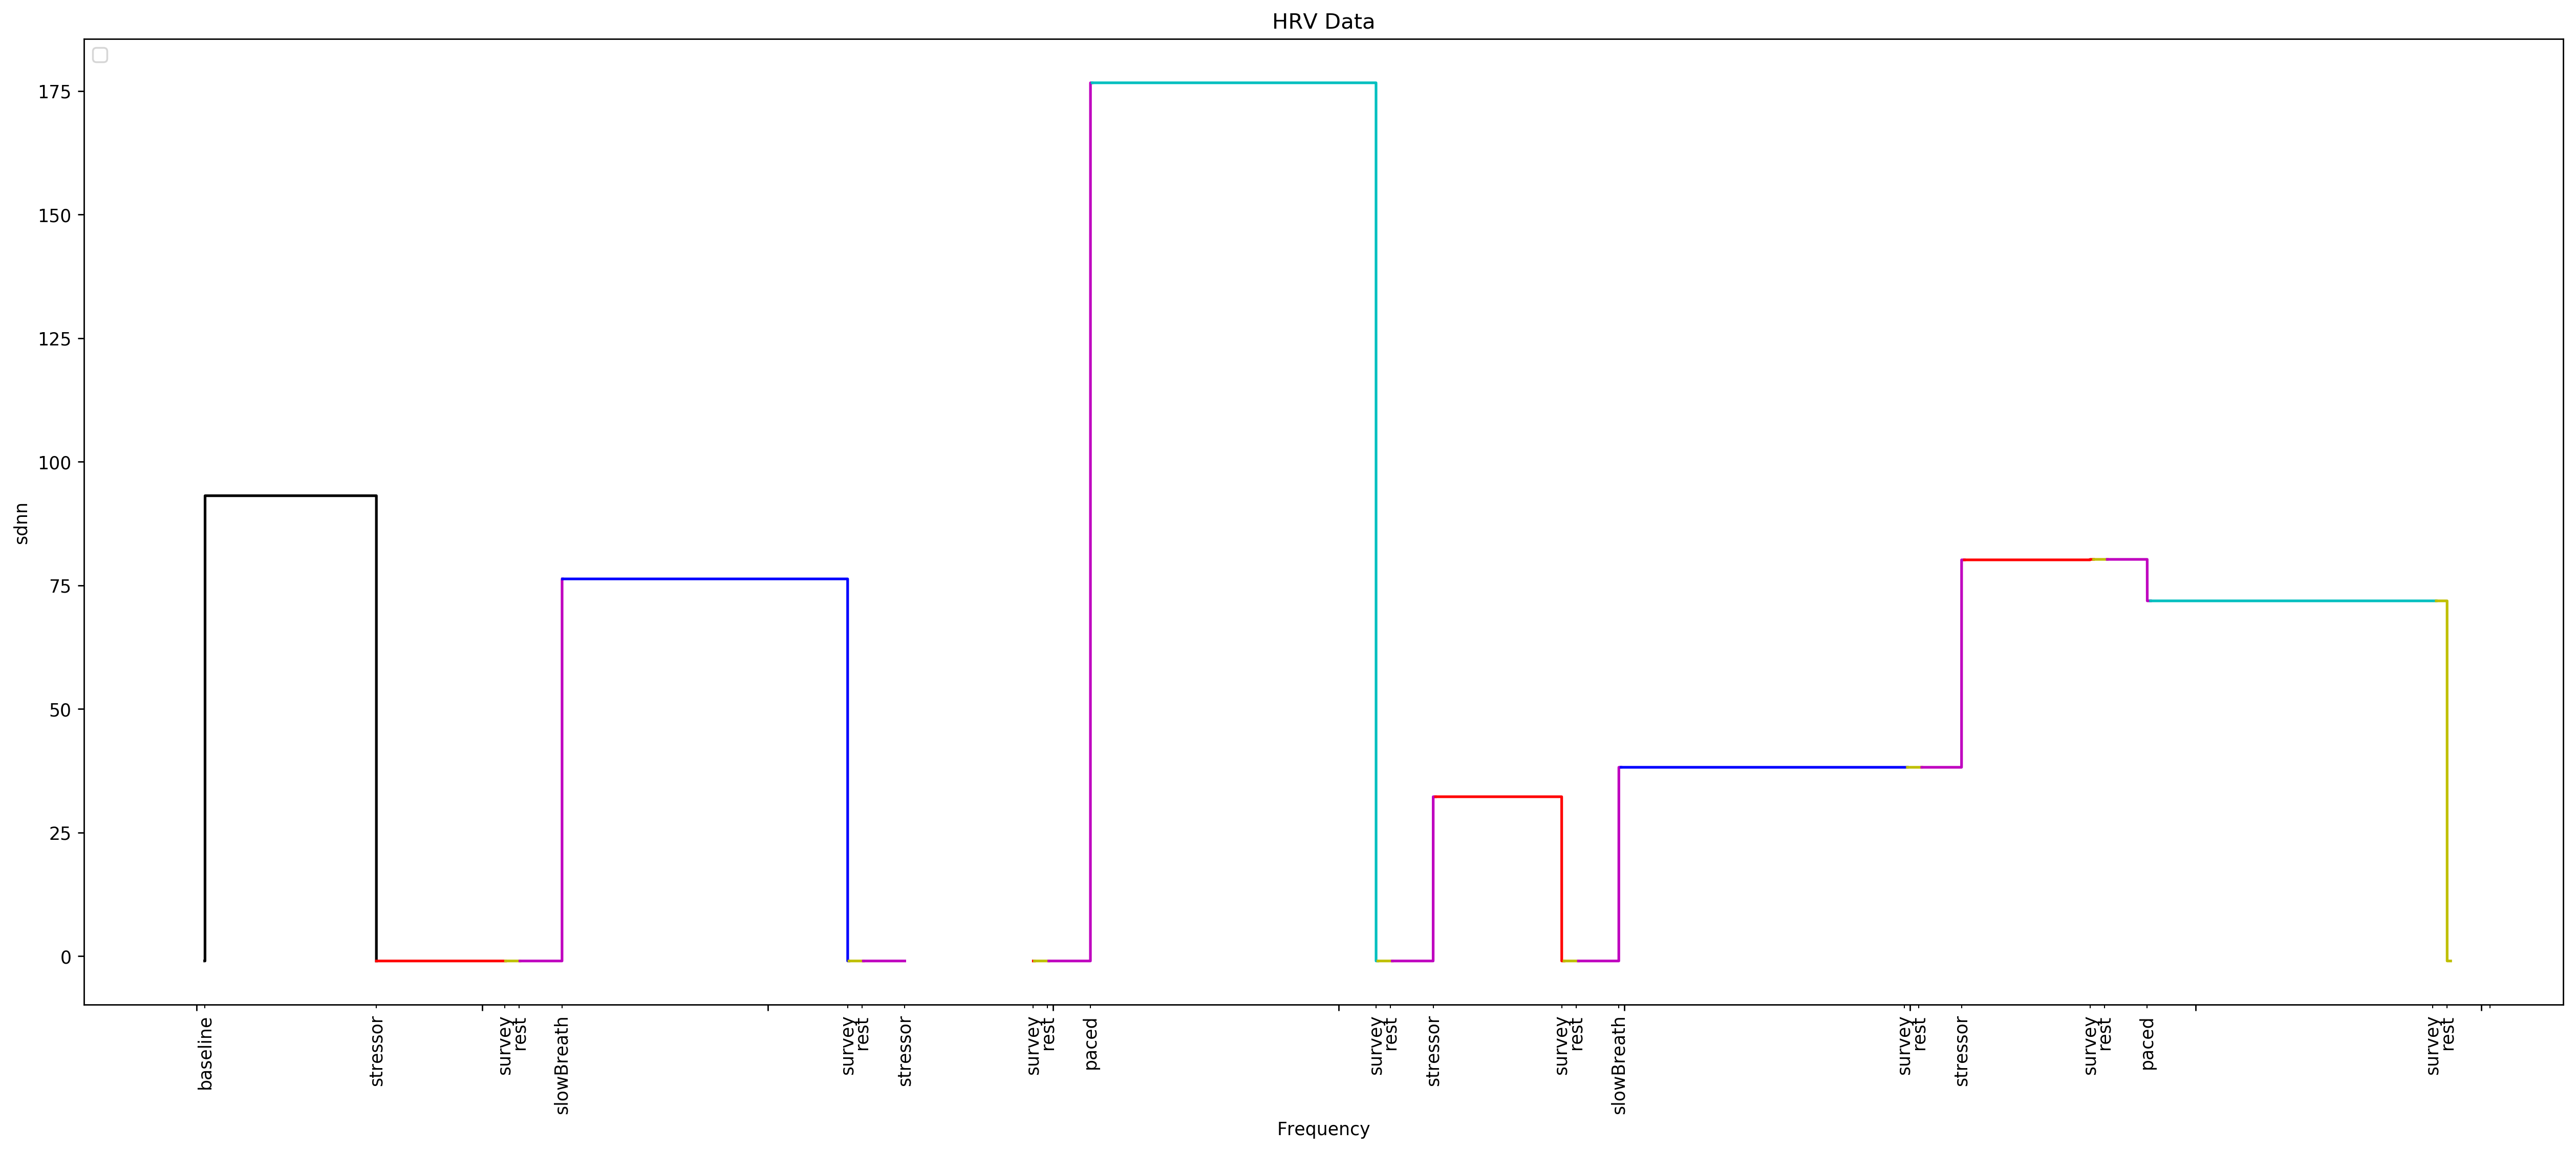

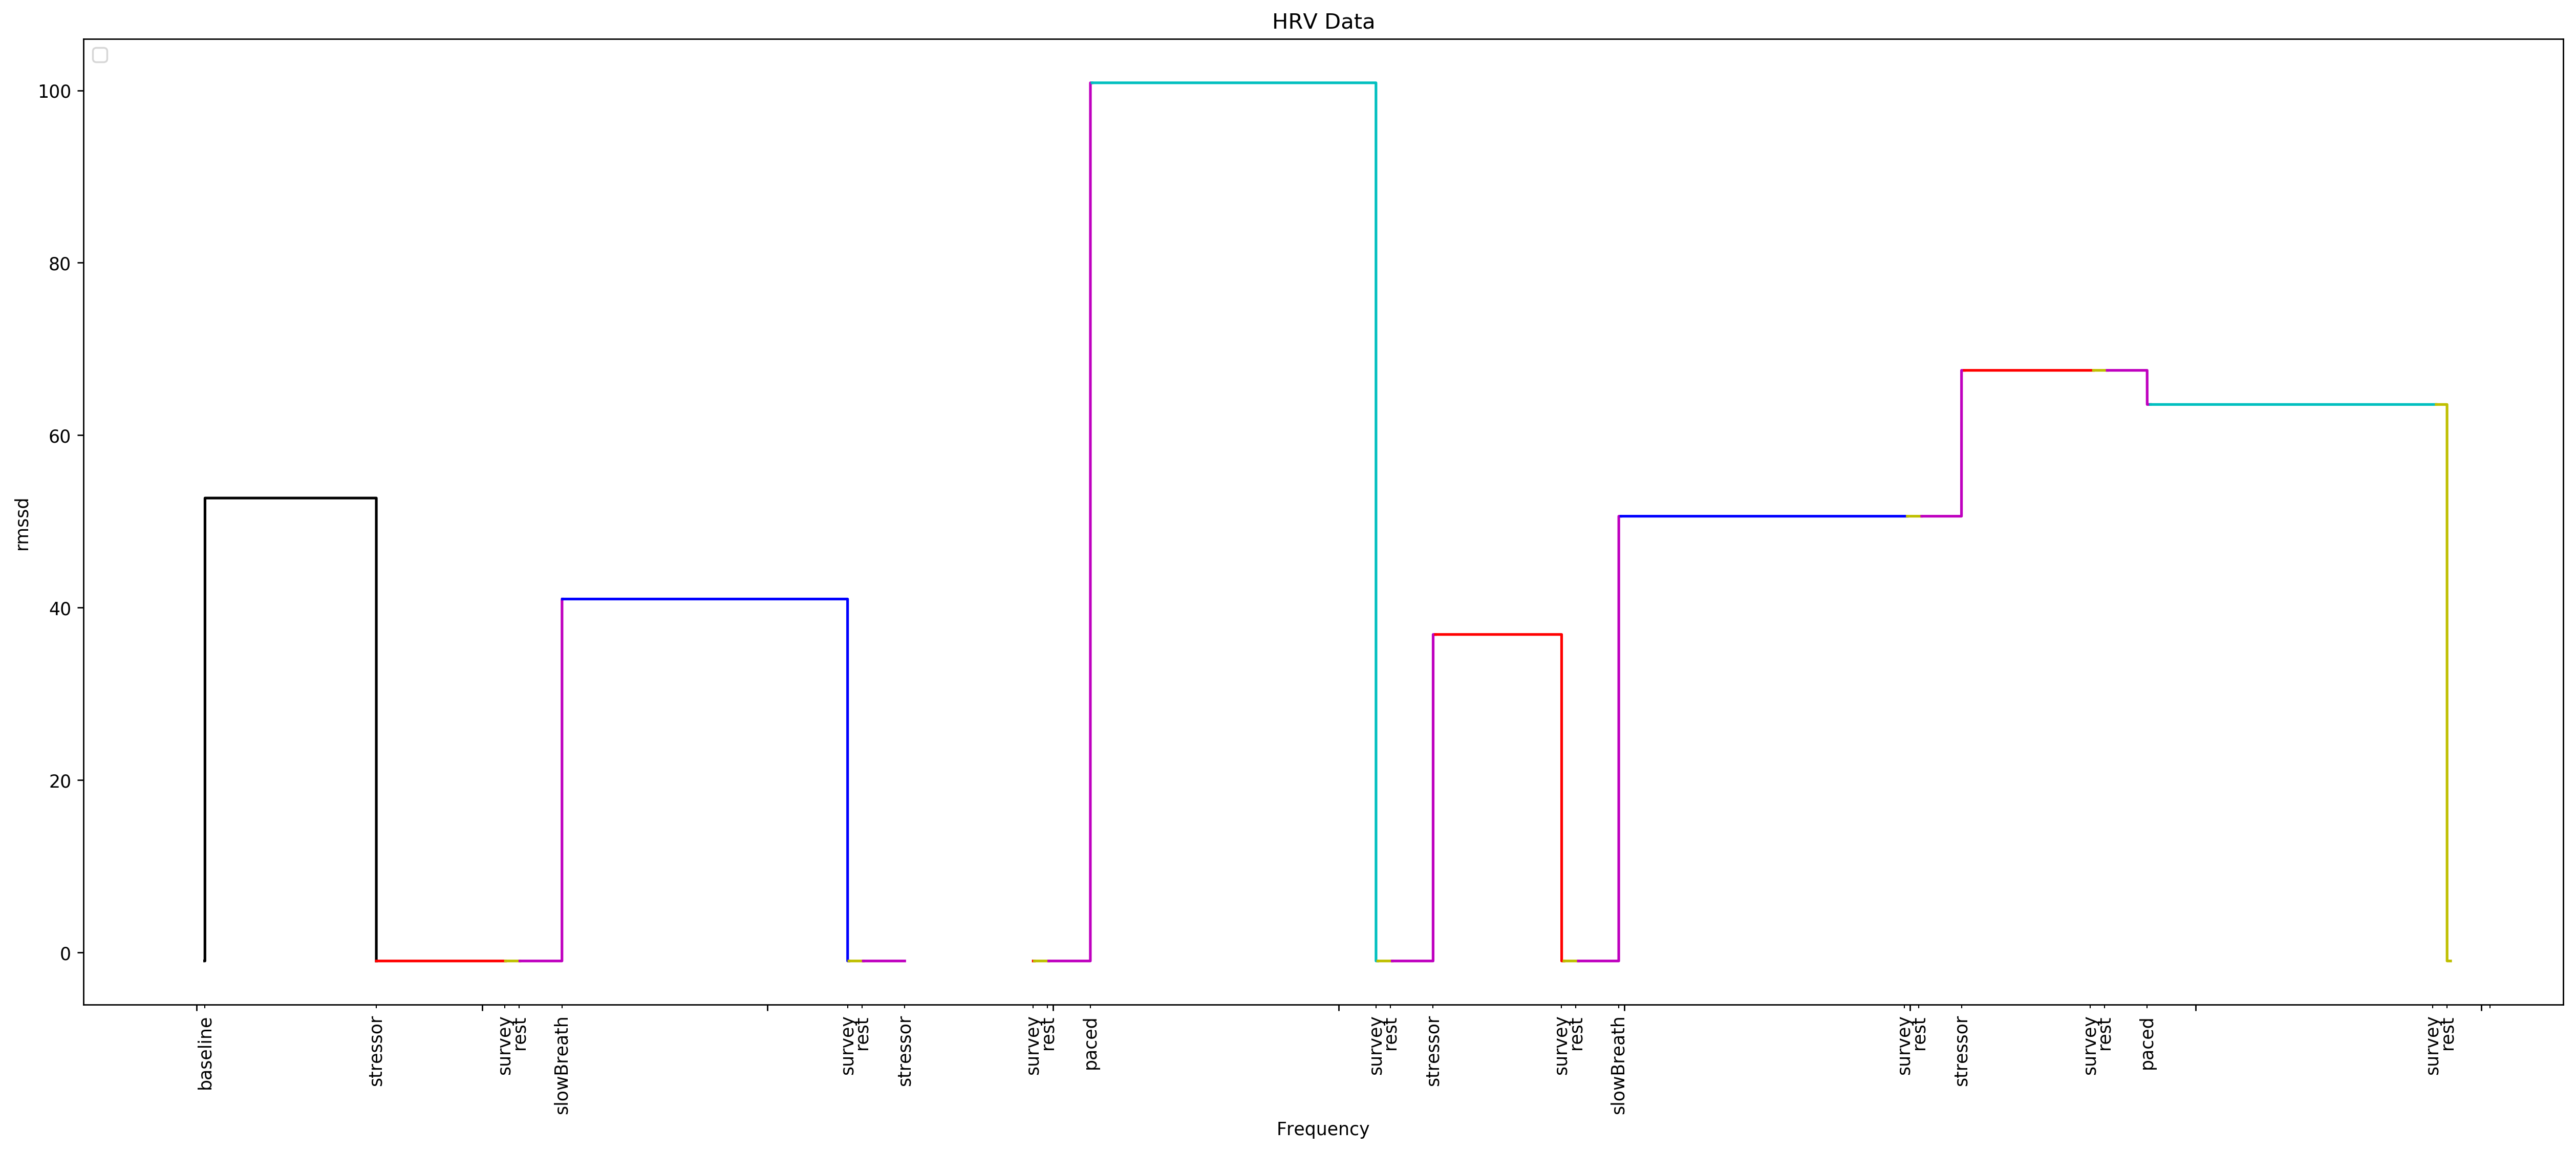

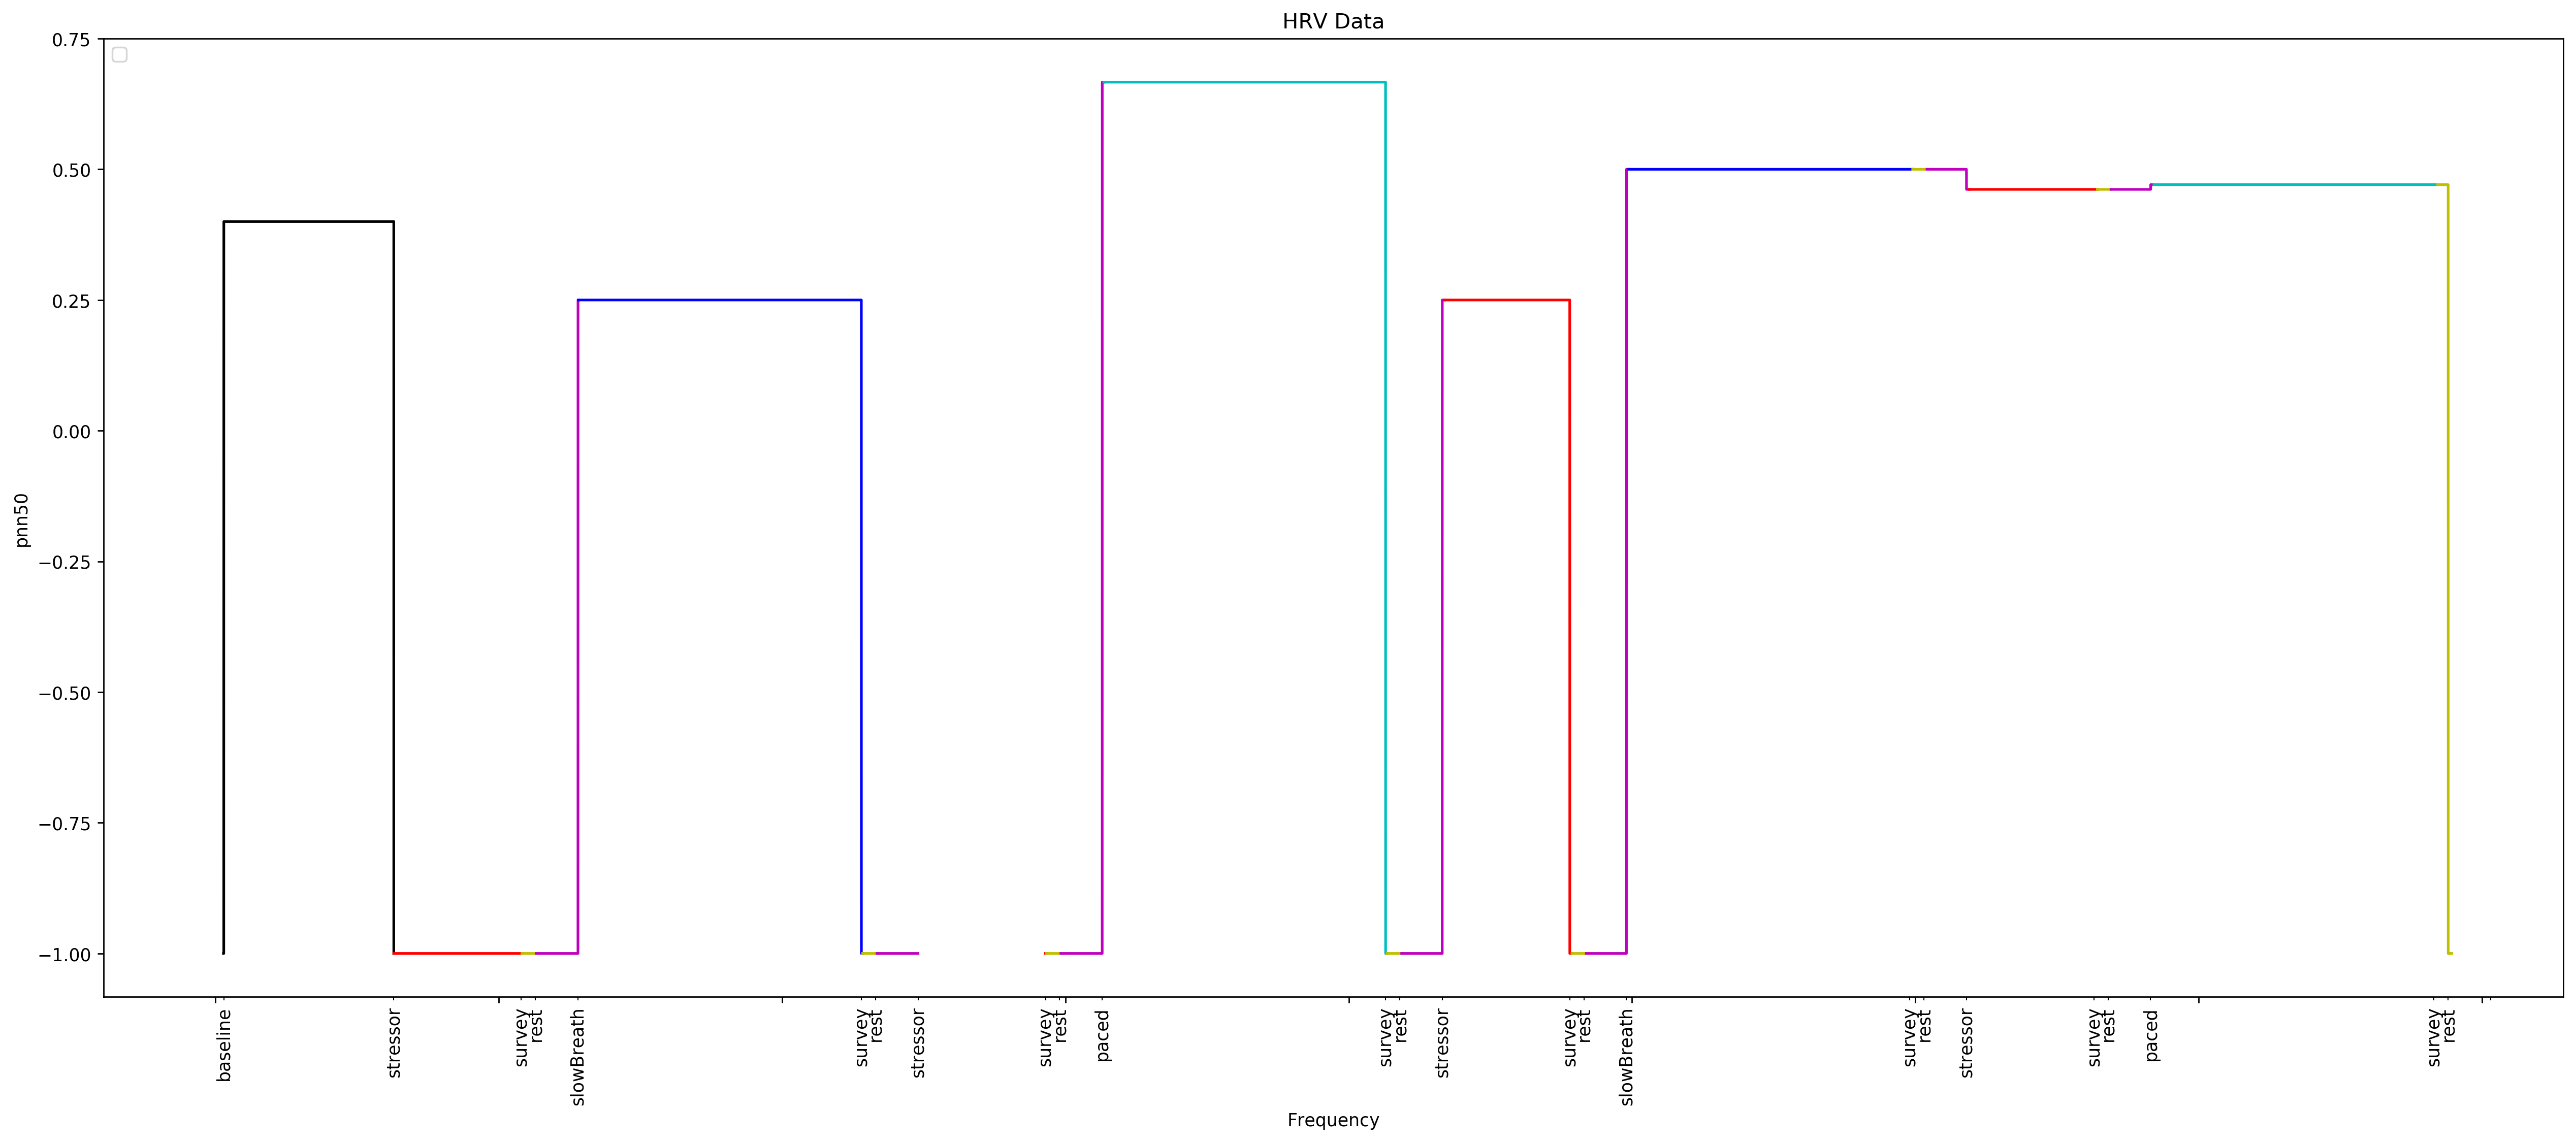

In [60]:
ma(files[0])

In [61]:
t=len(files)
if len(files)>32:
    t=32
p = Pool(len(files))
p.map(makeGraph, files)

/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [11]:
# for file in files:
#     makeGraph(file)

In [62]:
#Upload to normal
# !~/gdrive-linux-x64 upload -r --parent 15_ZWlKZqxfX5iqFYa31y6A6fHjE_cQbG ~/pench/graphs/
#Upload to avg
!~/gdrive-linux-x64 upload -r --parent 1O4ZVk9ovebpnlLgaSDcTMADWjqnI1jz2 ~/pench/graphs-avg/
#Upload to psd
# !~/gdrive-linux-x64 upload -r --parent 1O4ZVk9ovebpnlLgaSDcTMADWjqnI1jz2 ~/pench/graphs-psd/

Creating directory graphs-avg
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-07_10-42-36-FOUR.2-rmssd.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-07_12-09-54-SIX-pnn50.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-14_11-09-00-SEVEN-rmssd.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-14_11-09-00-SEVEN-sdnn.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-14_11-43-46-EIGHT-hf.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-29_17-19-28-ELI-hf.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-10_10-55-19=ONE.2-bpm.png
Uploading /home/sean/pench/graphs-avg/OpenBCISession_2020-02-06_11-26-48-TWO-sdnn.png
Creating directory .ipynb_checkpoints
Uploading /home/sean/pench/graphs-avg/.ipynb_checkpoints/OpenBCISession_2020-02-23_16-49-310-VIR-sdnn-checkpoint.png
Uploading /home/sean/pench/graphs-avg/.ipynb_checkpoints/OpenBCISession_2020-02-06_11-26-48-TWO-pnn50-checkpoint.png
U

In [13]:
data[0]

[20,
 17560.07,
 17216.7,
 5152.75,
 2391.03,
 4140.66,
 4405.57,
 3411.7,
 228.32,
 6237.81,
 1431.67,
 13483.02,
 -9154.36,
 5237.44,
 8030.2,
 8008.45,
 1521.39,
 510,
 datetime.datetime(1900, 1, 1, 11, 10, 20, 642000),
 {'bpm': -1,
  'ibi': -1,
  'sdnn': -1,
  'sdsd': -1,
  'rmssd': -1,
  'pnn20': -1,
  'pnn50': -1,
  'hr_mad': -1,
  'sd1': -1,
  'sd2': -1,
  's': -1,
  'sd1/sd2': -1,
  'breathingrate': -1,
  'lf': -1,
  'hf': -1,
  'lf/hf': -1,
  'segment_indices': (-1, -1)},
 'sync']